In [1]:
import numpy as np
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings

import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
import numpy as np 
import pandas as pd 
import seaborn as sns # viz
import matplotlib.pyplot as plt # viz
from scipy import stats
import json
from typing import List, Tuple
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model

import warnings
warnings.filterwarnings('ignore')


# Import SPLIT OHE Dataset

In [2]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
train_df = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val/full_train_df_feats.csv')
train_df = train_df.drop(columns="evil")
test_df = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val/full_test_df_feats.csv')
test_df = test_df.drop(columns="evil")
validation_df = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val/full_val_df_feats.csv')
validation_df = validation_df.drop(columns="evil")



a:\Desktop\FYP Final Files\Analysis Notebooks


# Analysis

Check for nulls, pretty standard

In [3]:
train_df[train_df.columns].isnull().sum()

processId          0
parentProcessId    0
userId             0
mountNamespace     0
eventId            0
argsNum            0
returnValue        0
sus                0
dtype: int64

In [4]:
test_df[test_df.columns].isnull().sum()

processId          0
parentProcessId    0
userId             0
mountNamespace     0
eventId            0
argsNum            0
returnValue        0
sus                0
dtype: int64

In [5]:
validation_df[validation_df.columns].isnull().sum()

processId          0
parentProcessId    0
userId             0
mountNamespace     0
eventId            0
argsNum            0
returnValue        0
sus                0
dtype: int64

Lets get a quick look at what columns we are dealing with

In [6]:
train_df.head()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
0,1,0,0,1,157,5,0,1
1,1,0,0,1,3,1,0,1
2,1,0,0,1,1010,0,0,1
3,1,1,0,0,21,2,2,1
4,1,1,0,0,1005,4,0,1


Lets look at distribution

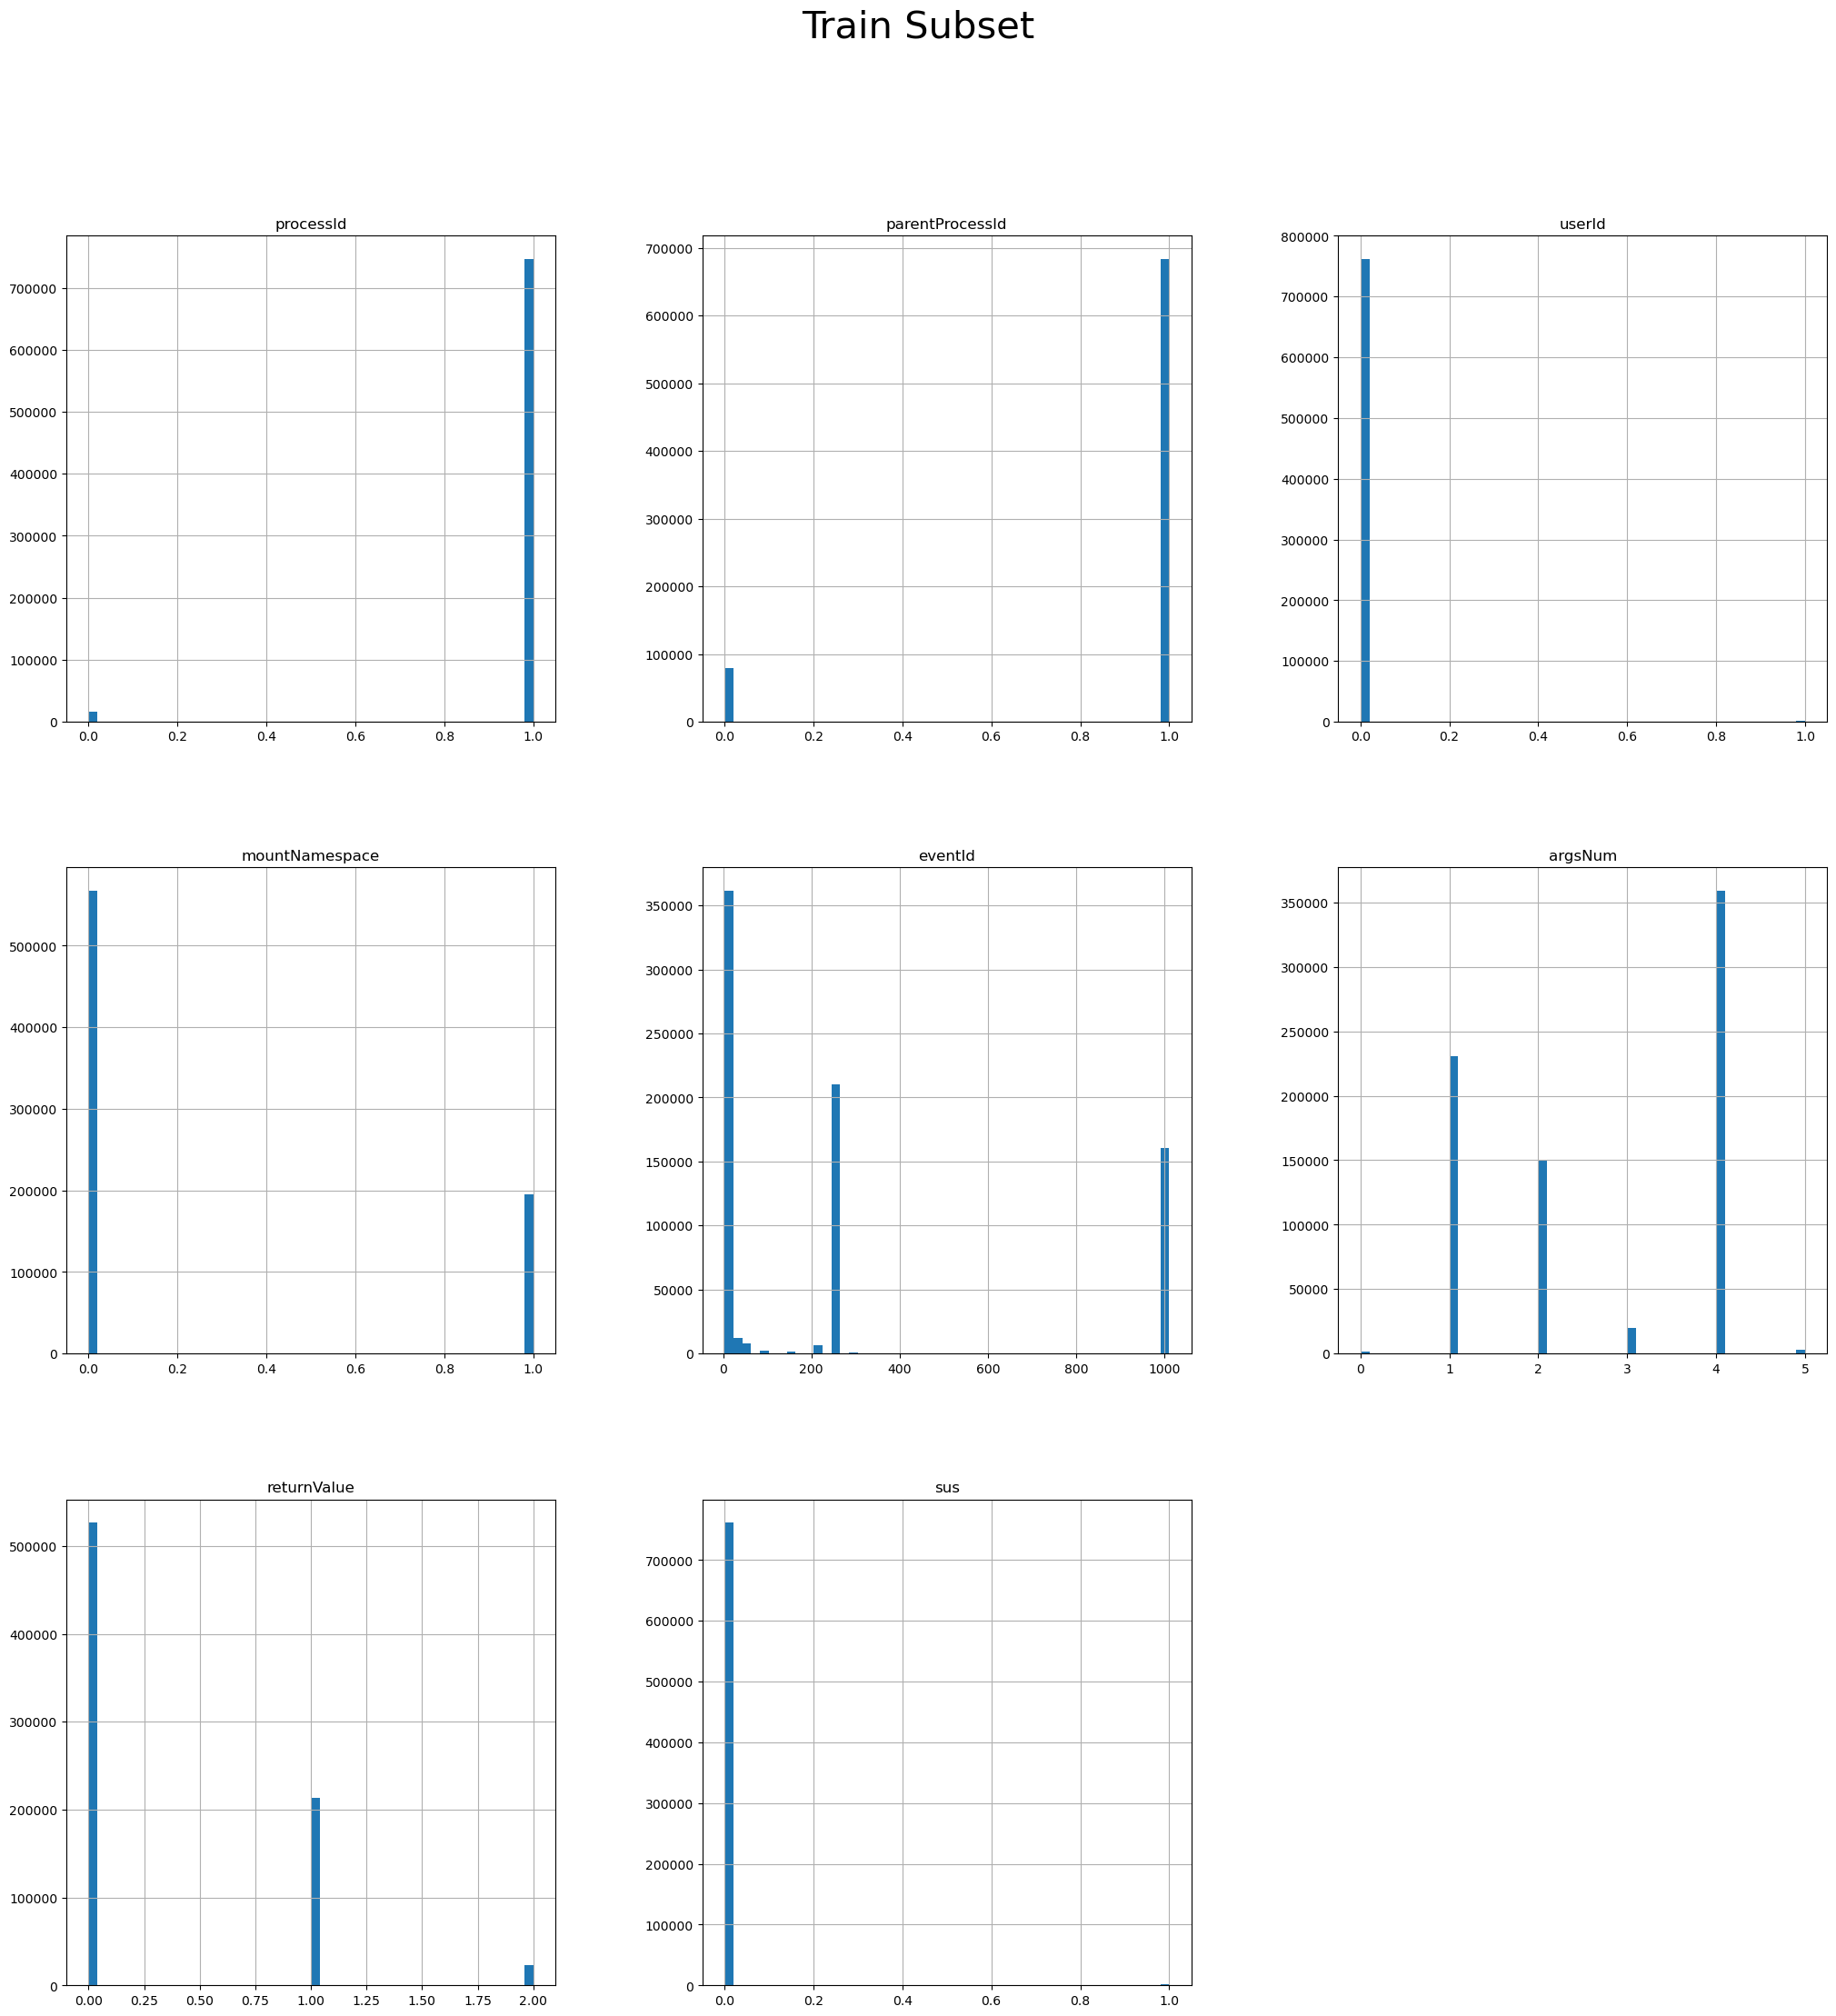

In [7]:
train_df.hist(bins = 50, figsize = (25,25))
plt.suptitle('Train Subset', fontsize=30)
plt.show()

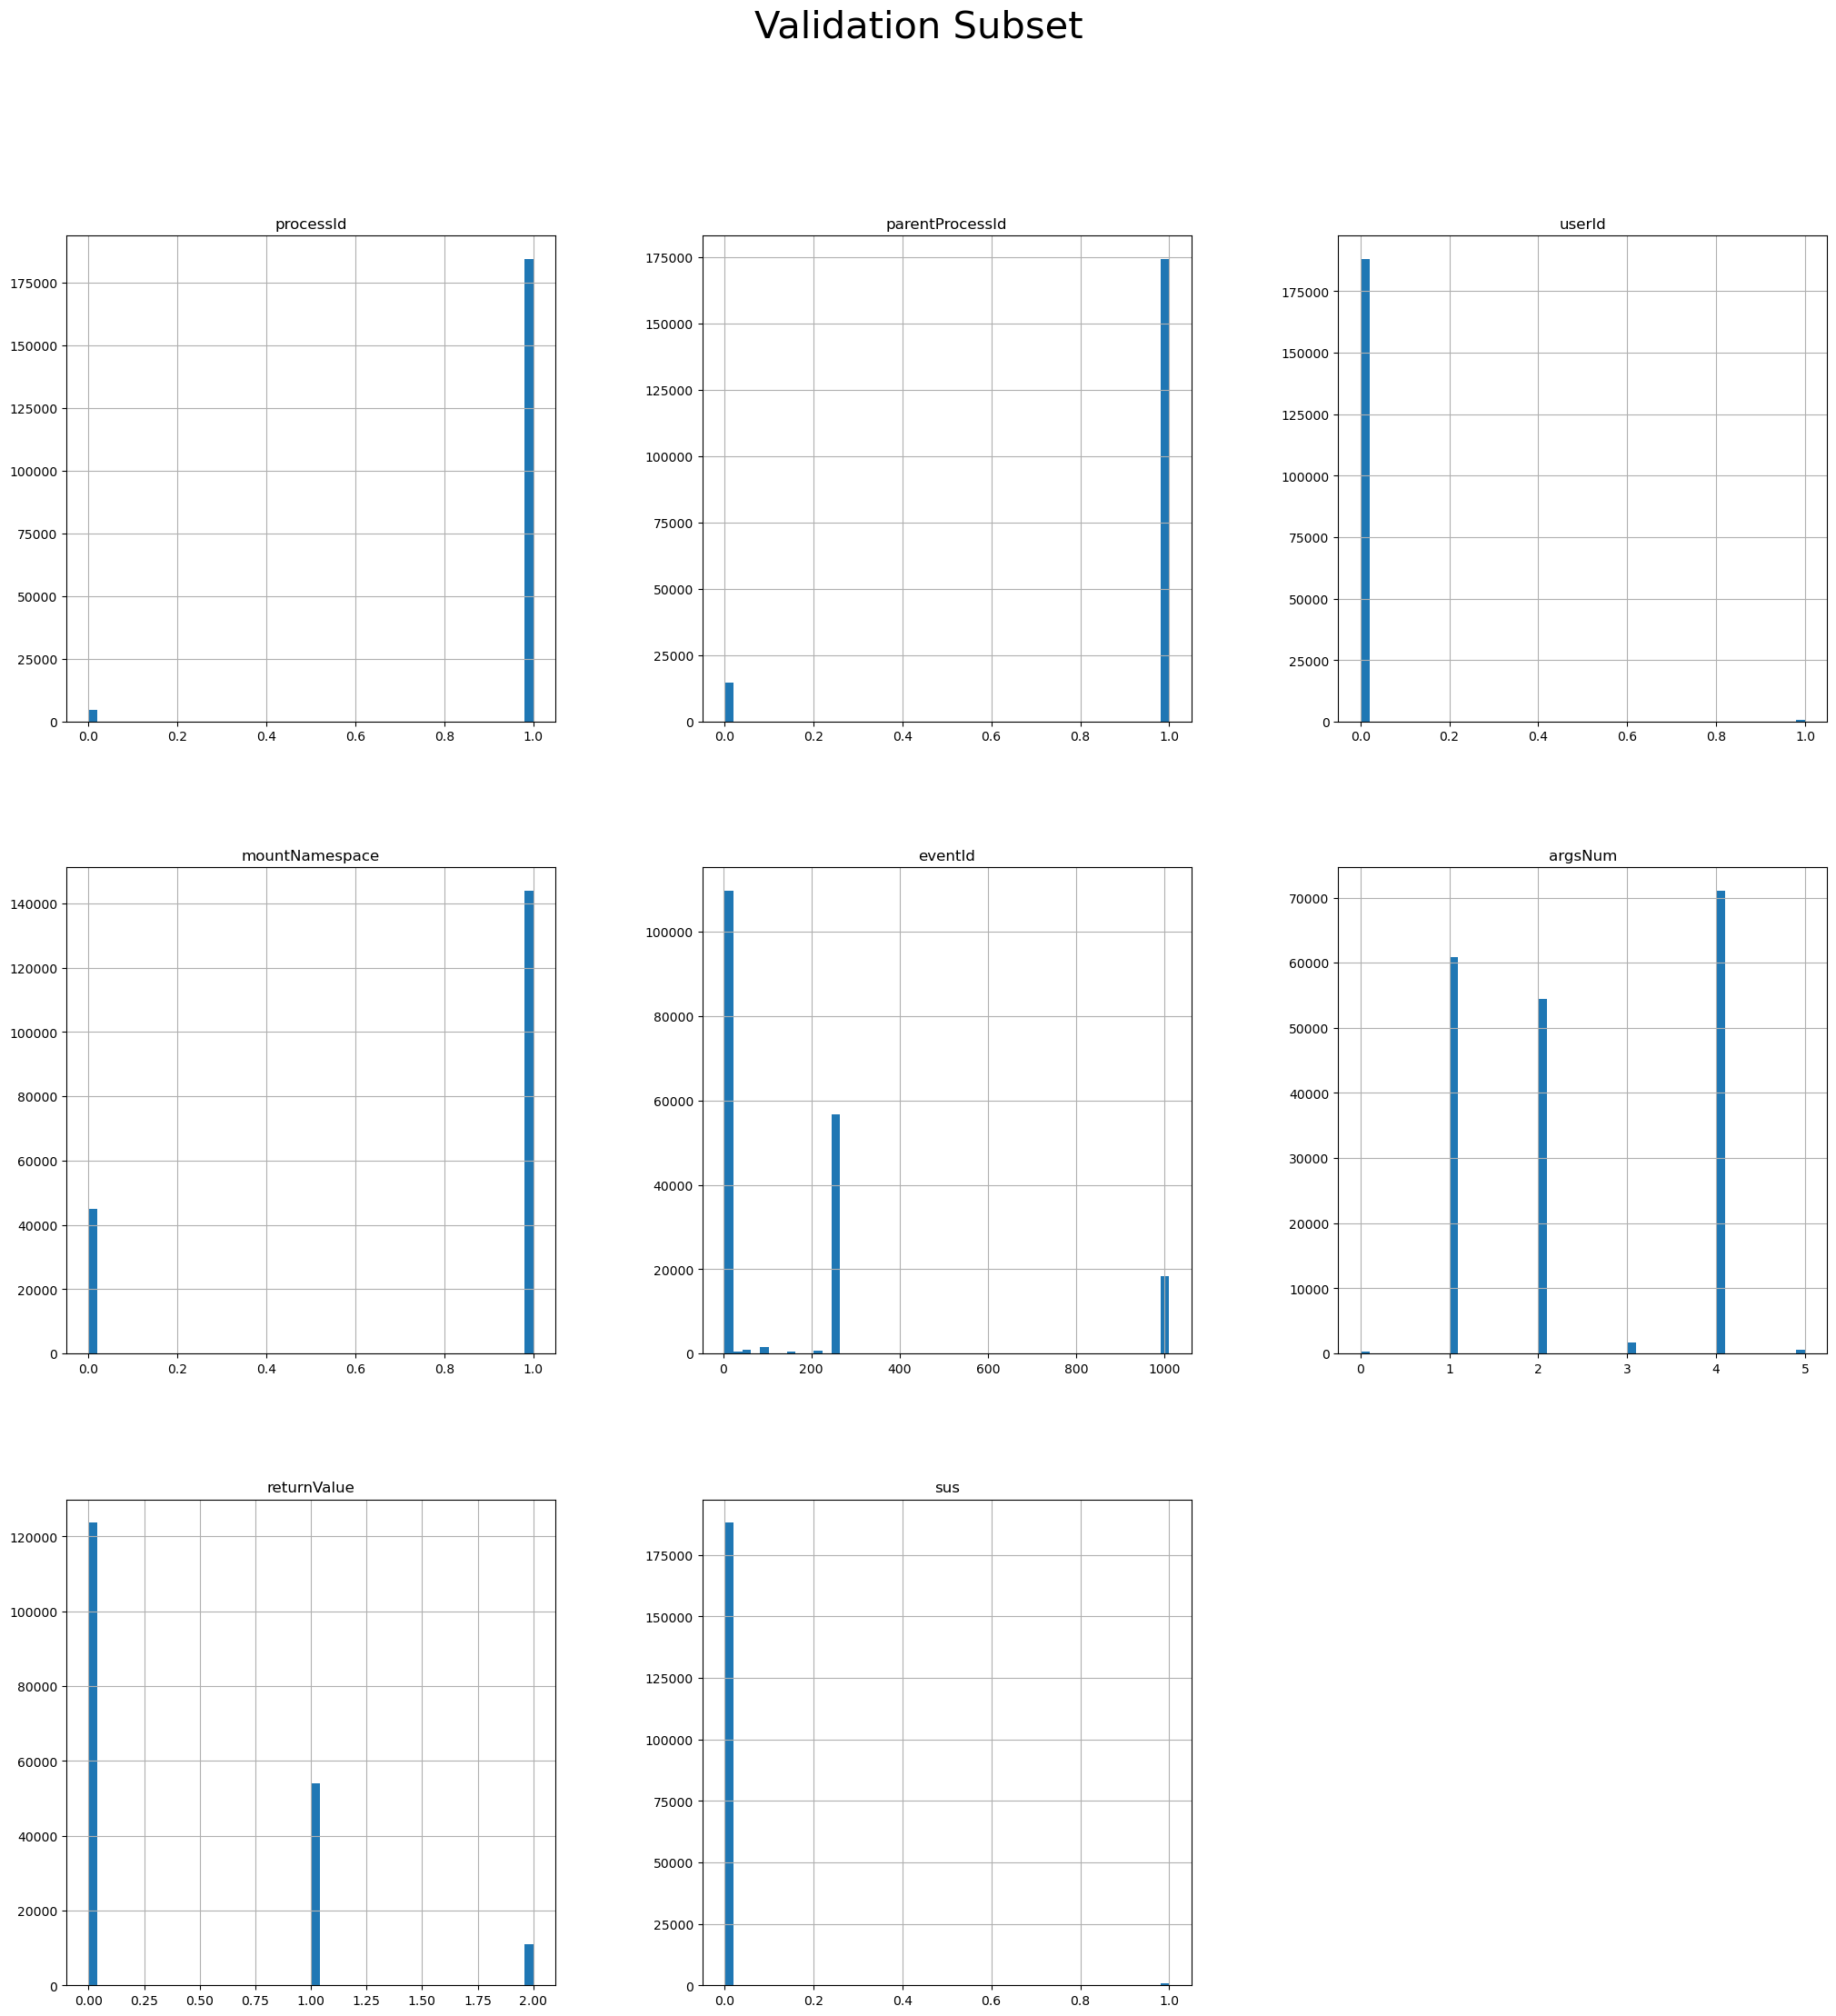

In [8]:
validation_df.hist(bins = 50, figsize = (25,25))
plt.suptitle('Validation Subset', fontsize=30)
plt.show()

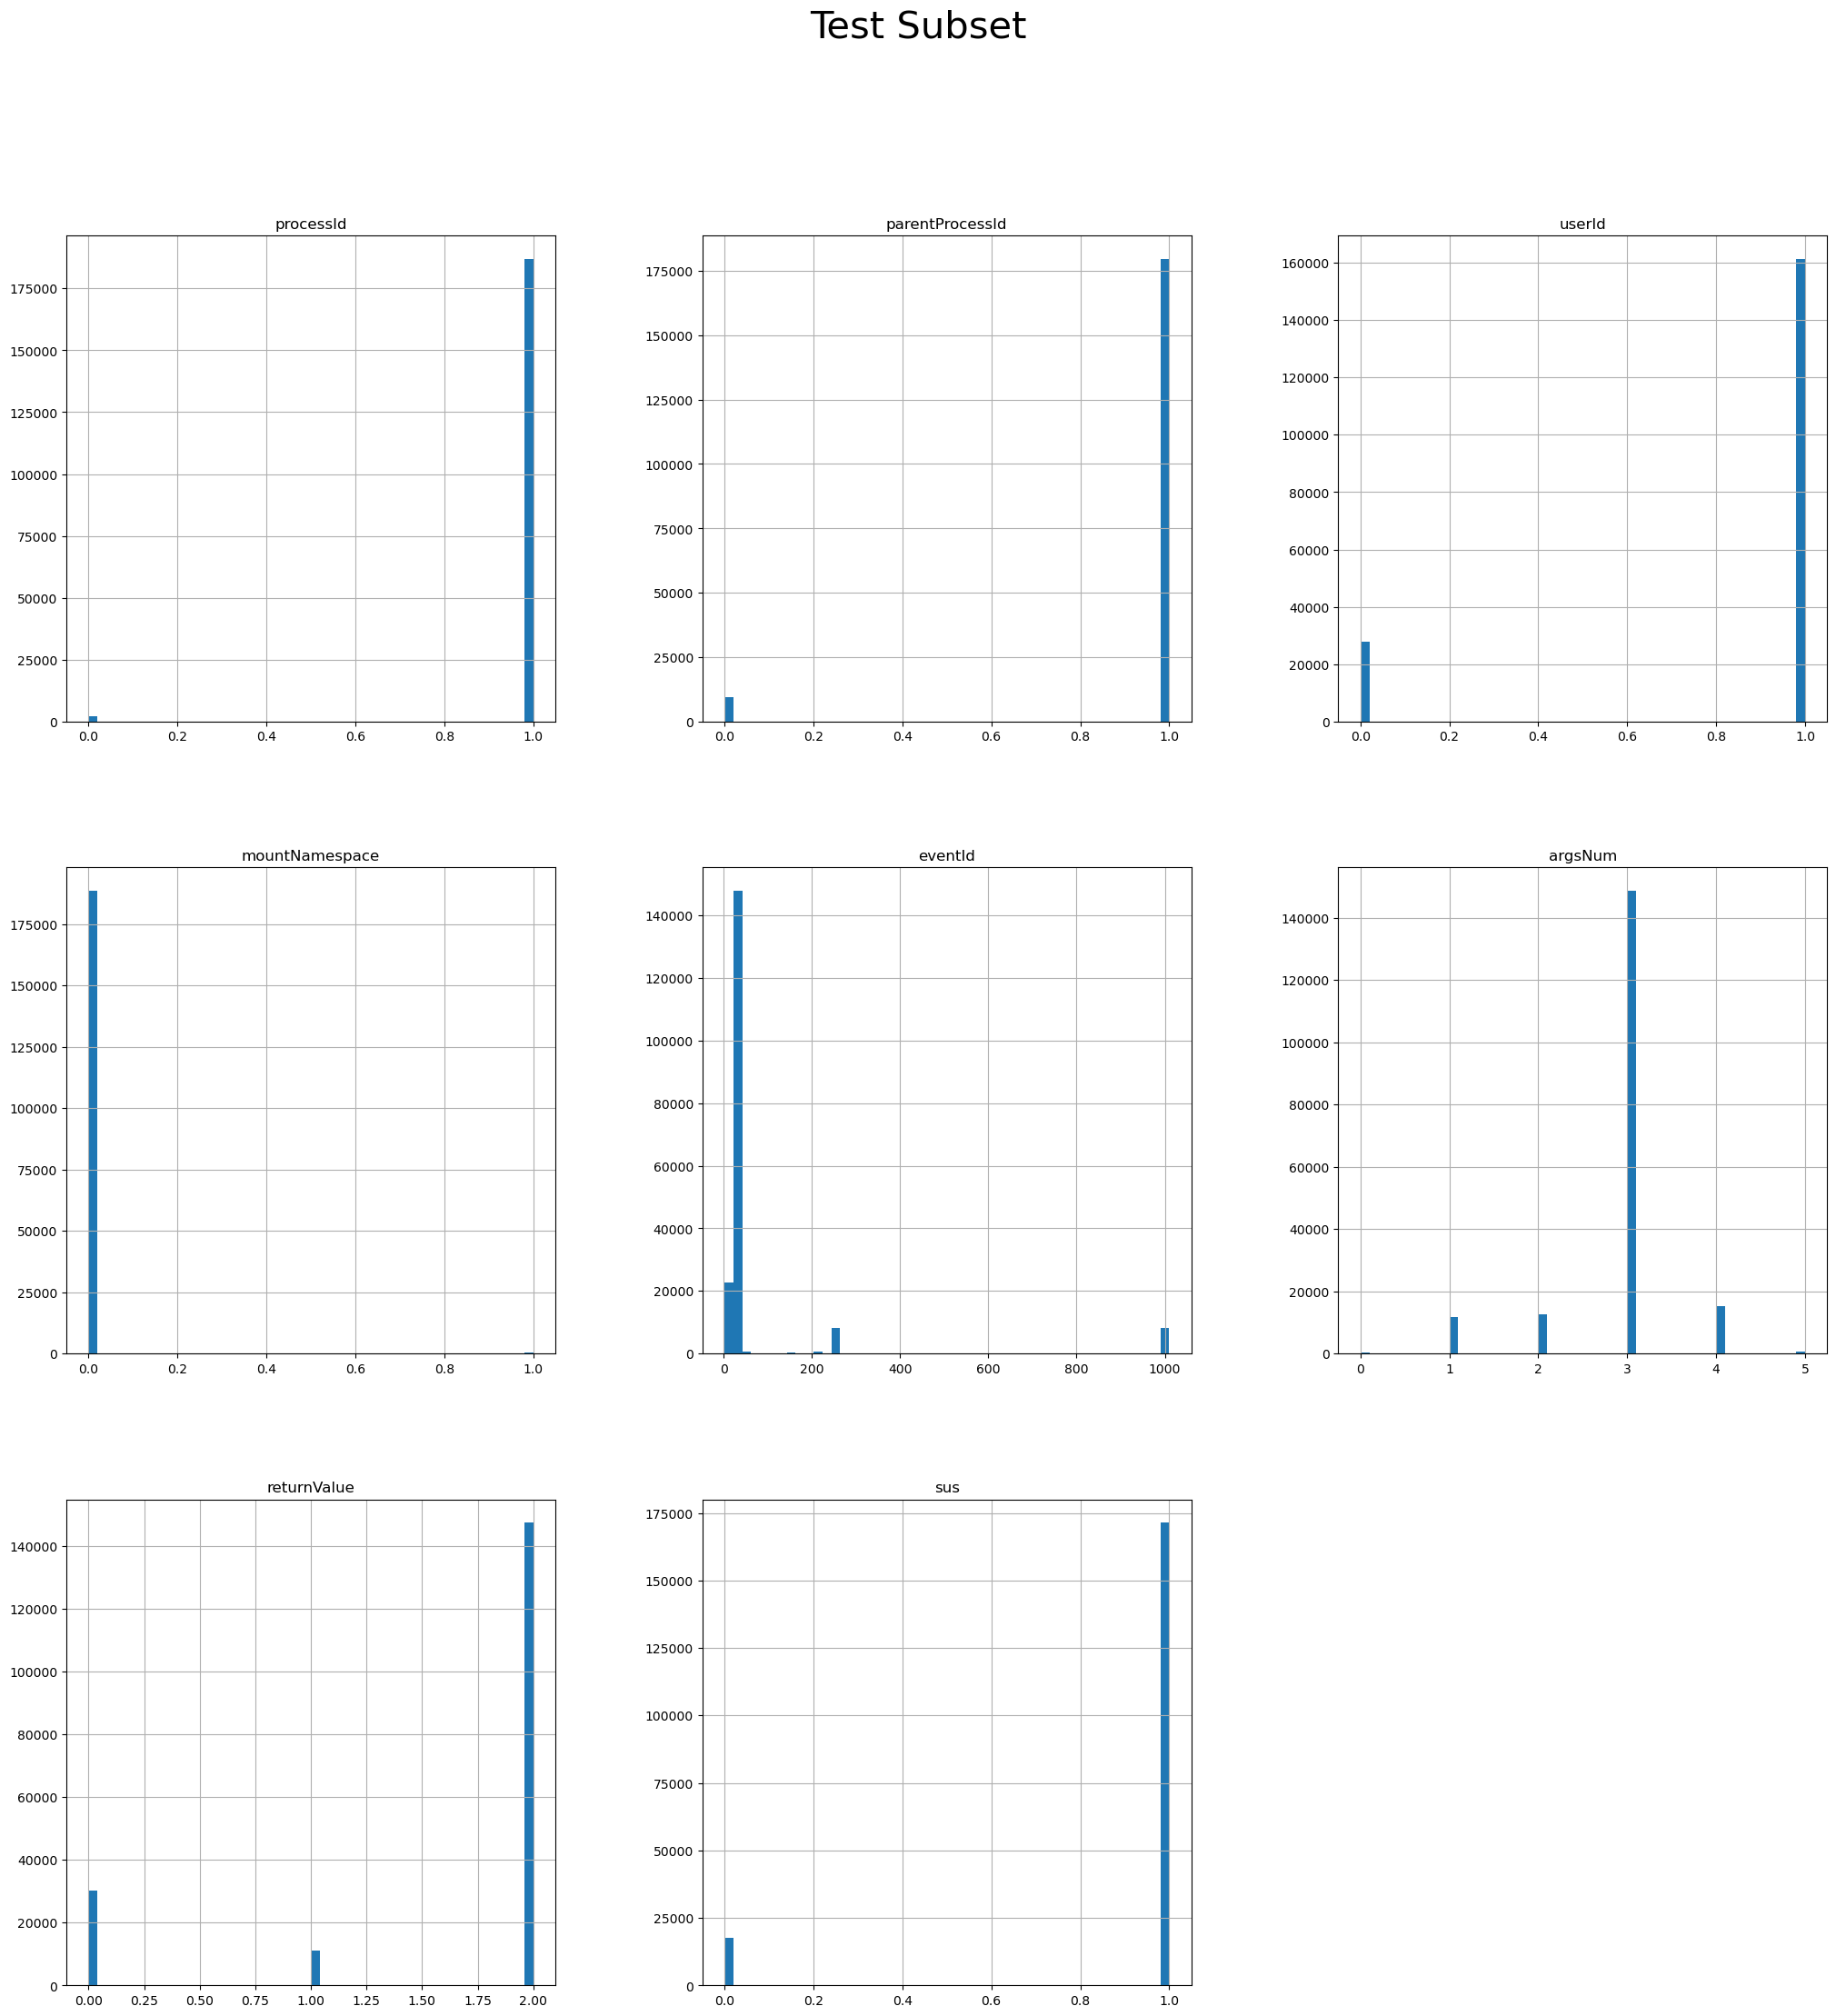

In [9]:
test_df.hist(bins = 50, figsize = (25,25))
plt.suptitle('Test Subset', fontsize=30)
plt.show()

In [10]:
benign_train = train_df.loc[train_df['sus'] == 0, :]
benign_train.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
count,761875.000000,761875.000000,761875.0,761875.000000,761875.000000,761875.000000,761875.000000,761875.0
mean,0.978582,0.896944,0.0,0.256751,288.322322,2.672373,0.338982,0.0
std,0.144774,0.304033,0.0,0.436841,385.213666,1.341081,0.532078,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.0
50%,1.000000,1.000000,0.0,0.000000,62.000000,3.000000,0.000000,0.0
75%,1.000000,1.000000,0.0,1.000000,257.000000,4.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,0.0


In [11]:
benign_test = test_df.loc[test_df['sus'] == 0, :]
benign_test.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
count,17508.000000,17508.000000,17508.0,17508.000000,17508.000000,17508.000000,17508.000000,17508.0
mean,0.881768,0.687000,0.0,0.018906,303.943683,2.635252,0.323052,0.0
std,0.322891,0.463728,0.0,0.136196,401.915892,1.313026,0.557476,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.0,0.000000,4.000000,1.000000,0.000000,0.0
50%,1.000000,1.000000,0.0,0.000000,59.000000,2.000000,0.000000,0.0
75%,1.000000,1.000000,0.0,0.000000,257.000000,4.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,0.0


In [12]:
benign_val = validation_df.loc[validation_df['sus'] == 0, :]
benign_val.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
count,188181.000000,188181.000000,188181.0,188181.000000,188181.000000,188181.000000,188181.000000,188181.0
mean,0.975694,0.926417,0.0,0.765019,180.432360,2.446501,0.401039,0.0
std,0.153999,0.261092,0.0,0.423988,293.161034,1.293571,0.594955,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,0.000000,0.0
50%,1.000000,1.000000,0.0,1.000000,6.000000,2.000000,0.000000,0.0
75%,1.000000,1.000000,0.0,1.000000,257.000000,4.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,0.0


In [13]:
evil_train = train_df.loc[train_df['sus'] == 1, :]
evil_train.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
count,1269.0,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.0
mean,1.0,0.182033,0.784870,0.028369,190.076438,2.497242,0.960599,1.0
std,0.0,0.386024,0.411075,0.166090,307.257611,1.219337,0.942357,0.0
min,1.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.0
25%,1.0,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,1.0
50%,1.0,0.000000,1.000000,0.000000,6.000000,2.000000,1.000000,1.0
75%,1.0,0.000000,1.000000,0.000000,257.000000,4.000000,2.000000,1.0
max,1.0,1.000000,1.000000,1.000000,1010.000000,5.000000,2.000000,1.0


In [14]:
evil_val = validation_df.loc[validation_df['sus'] == 1, :]
evil_val.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
count,786.0,786.000000,786.00000,786.0,786.000000,786.000000,786.000000,786.0
mean,1.0,0.038168,0.98855,0.0,170.151399,2.428753,1.049618,1.0
std,0.0,0.191724,0.10646,0.0,282.214665,1.184029,0.954416,0.0
min,1.0,0.000000,0.00000,0.0,3.000000,0.000000,0.000000,1.0
25%,1.0,0.000000,1.00000,0.0,4.000000,2.000000,0.000000,1.0
50%,1.0,0.000000,1.00000,0.0,6.000000,2.000000,1.000000,1.0
75%,1.0,0.000000,1.00000,0.0,257.000000,4.000000,2.000000,1.0
max,1.0,1.000000,1.00000,0.0,1010.000000,4.000000,2.000000,1.0


In [15]:
evil_test = test_df.loc[test_df['sus'] == 1, :]
evil_test.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus
count,171459.0,171459.000000,171459.000000,171459.0,171459.000000,171459.000000,171459.000000,171459.0
mean,1.0,0.977406,0.940464,0.0,66.833698,2.921048,1.753177,1.0
std,0.0,0.148607,0.236626,0.0,148.330638,0.514894,0.625609,0.0
min,1.0,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,1.0
25%,1.0,1.000000,1.000000,0.0,42.000000,3.000000,2.000000,1.0
50%,1.0,1.000000,1.000000,0.0,42.000000,3.000000,2.000000,1.0
75%,1.0,1.000000,1.000000,0.0,42.000000,3.000000,2.000000,1.0
max,1.0,1.000000,1.000000,0.0,1010.000000,5.000000,2.000000,1.0


Lets see the overlap

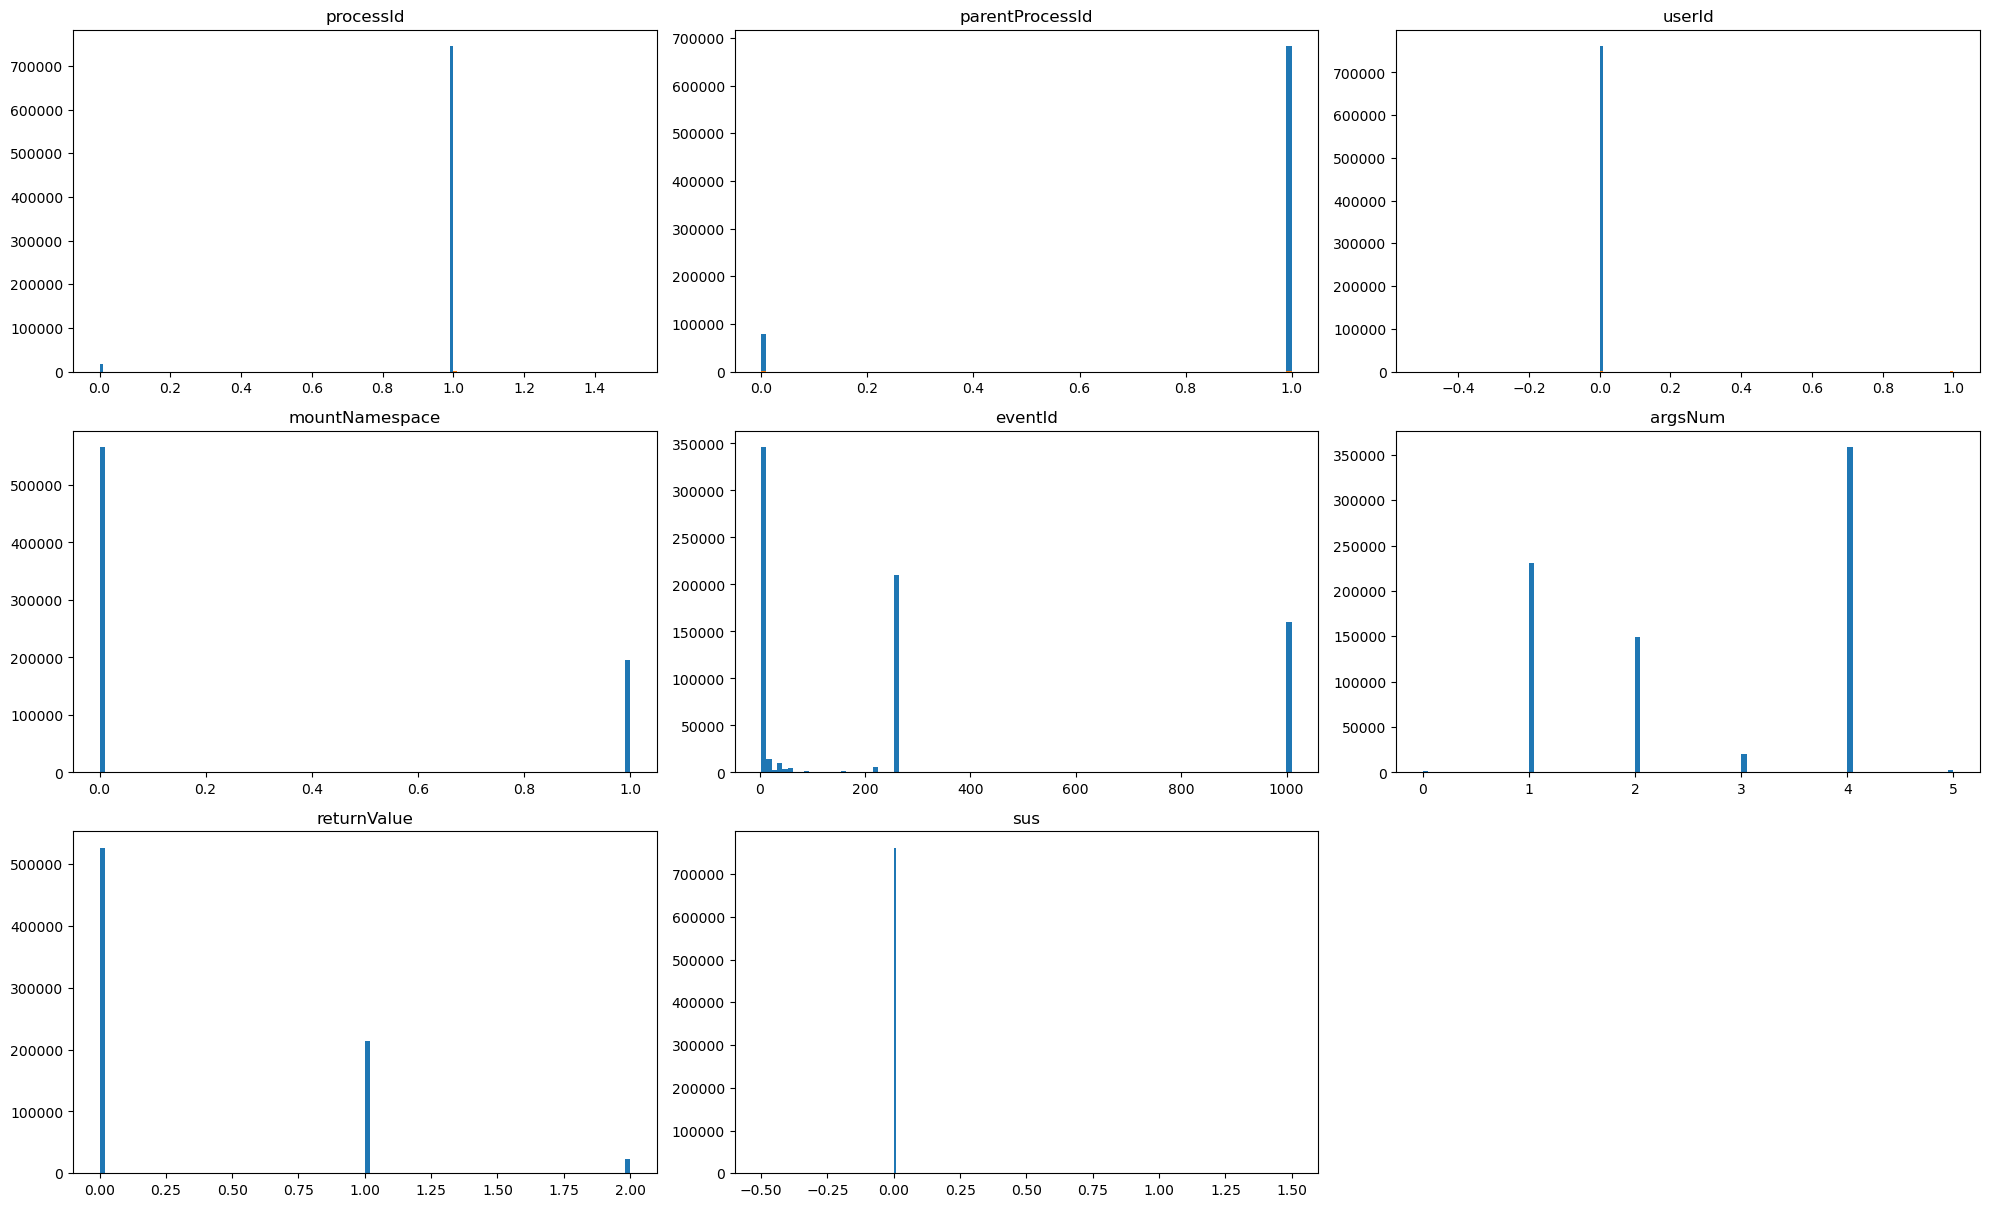

In [16]:
plt.figure(figsize=(20,40))
num=1
for col in benign_train.columns:
    plt.subplot(10,3,num)
    plt.hist(benign_train[col], bins = 100)
    plt.hist(evil_train[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

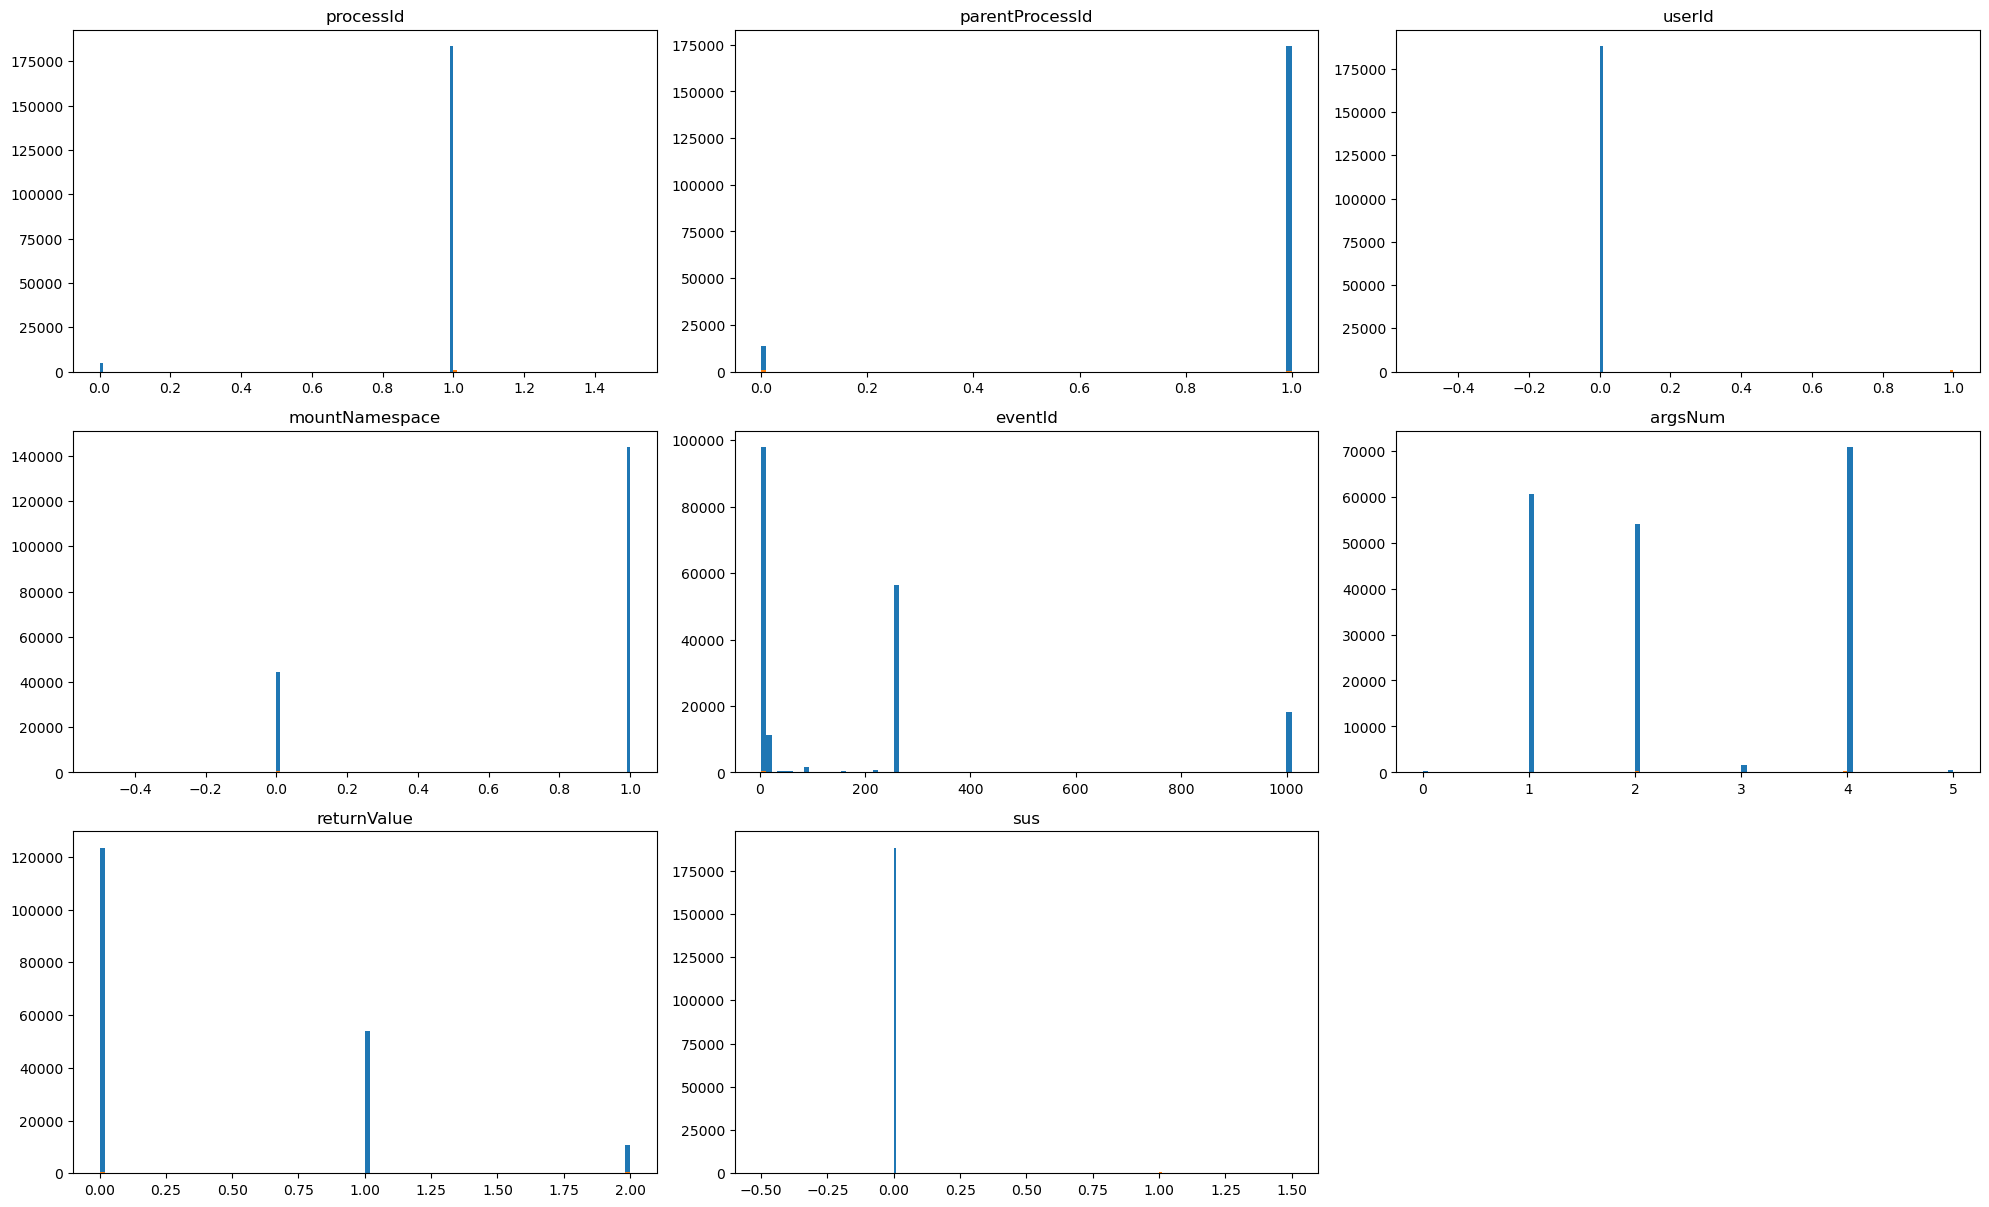

In [17]:
plt.figure(figsize=(20,40))
num=1
for col in benign_val.columns:
    plt.subplot(10,3,num)
    plt.hist(benign_val[col], bins = 100)
    plt.hist(evil_val[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

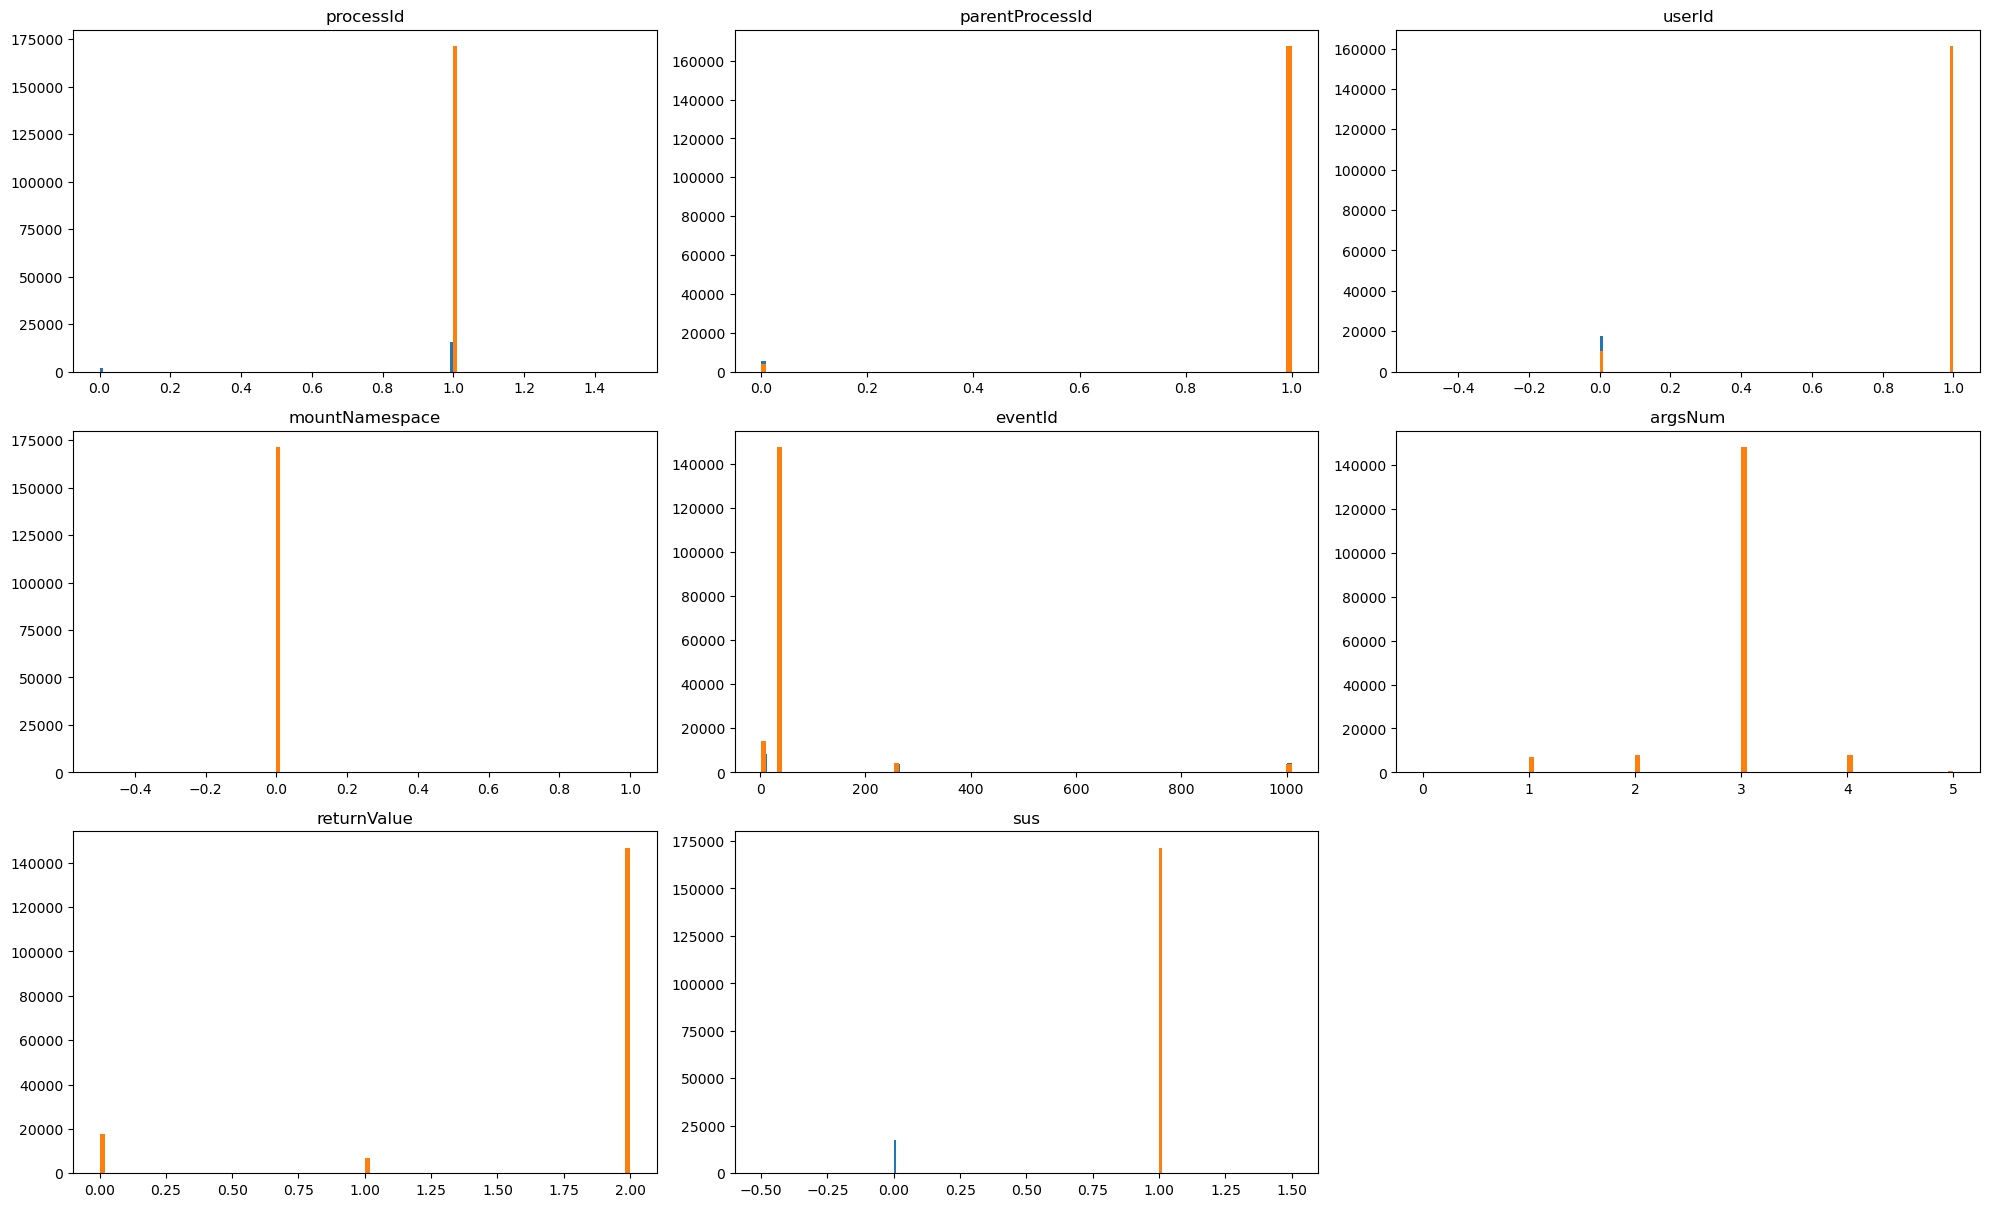

In [18]:
plt.figure(figsize=(20,40))
num=1
for col in benign_test.columns:
    plt.subplot(10,3,num)
    plt.hist(benign_test[col], bins = 100)
    plt.hist(evil_test[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

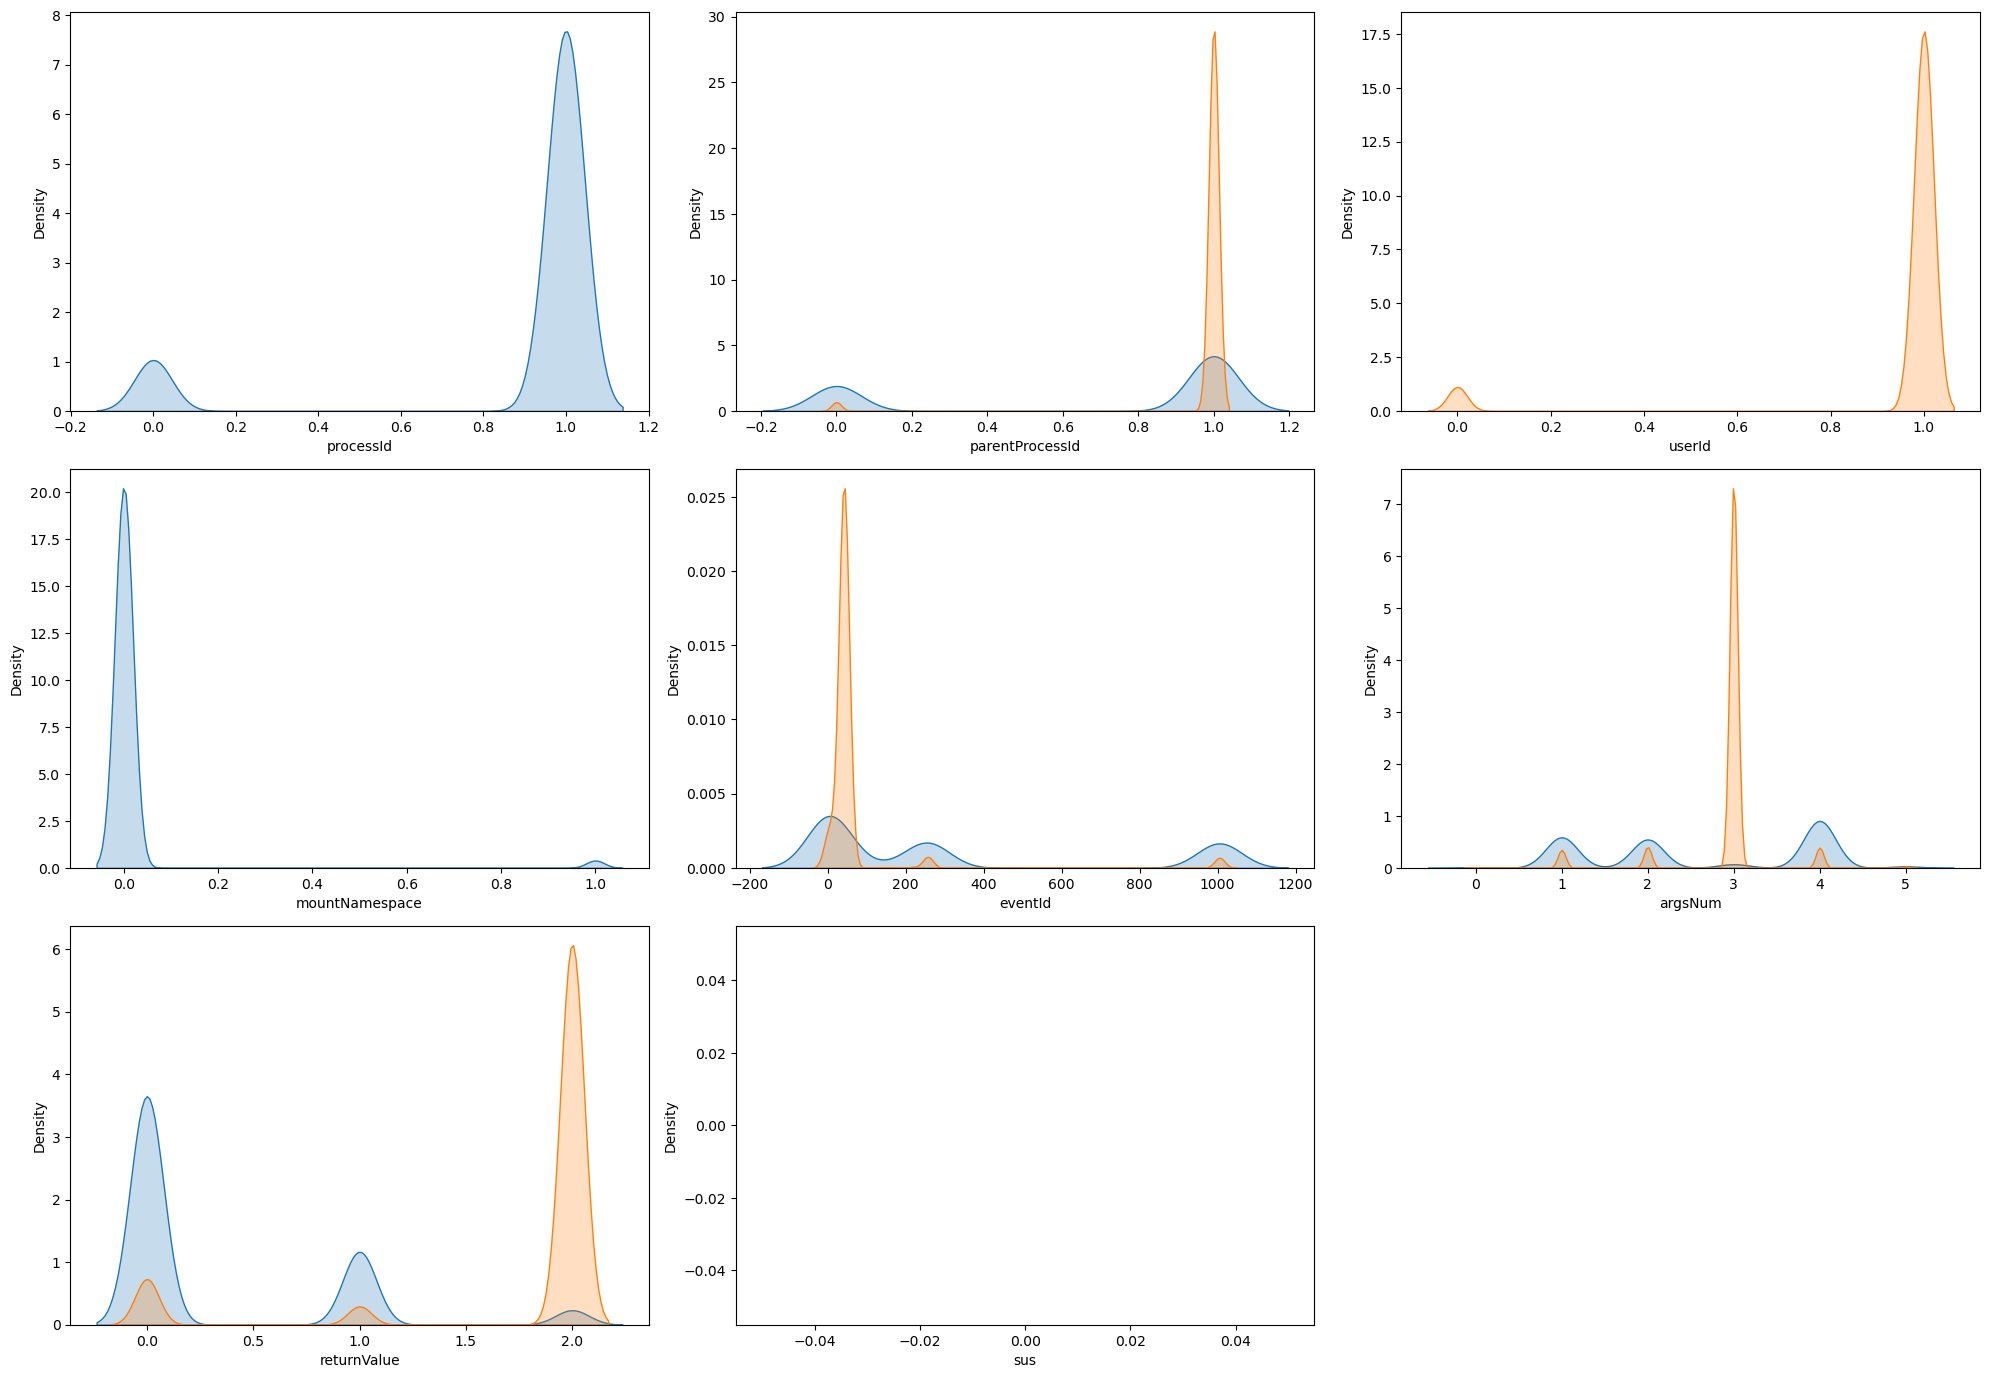

In [19]:
features = test_df.columns

plt.figure(figsize=(20,50))
num=1
for feature in features:
    plt.subplot(11,3,num)
    sns.kdeplot(benign_test[feature], shade= True)
    sns.kdeplot(evil_test[feature], shade= True)
    num=num+1
    plt.tight_layout()
plt.show()

Lets look at the frequency of our target features

<Axes: title={'center': 'Label Frequency for sus label in Train Dataset'}, xlabel='sus'>

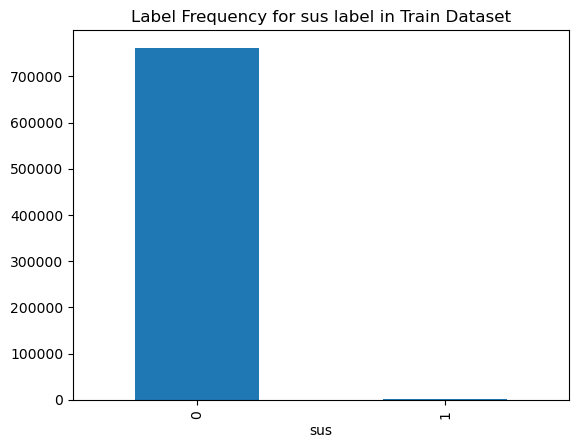

In [20]:
train_df.sus.value_counts().plot(kind='bar', title='Label Frequency for sus label in Train Dataset')

<Axes: title={'center': 'Label Frequency for sus label in Validation Dataset'}, xlabel='sus'>

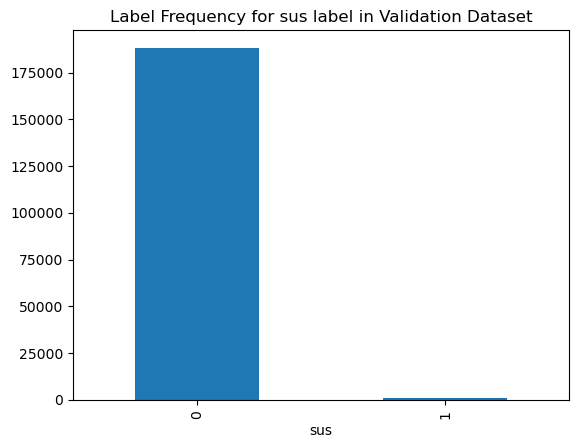

In [21]:
validation_df.sus.value_counts().plot(kind='bar', title='Label Frequency for sus label in Validation Dataset')

<Axes: title={'center': 'Label Frequency for sus label in Test Dataset'}, xlabel='sus'>

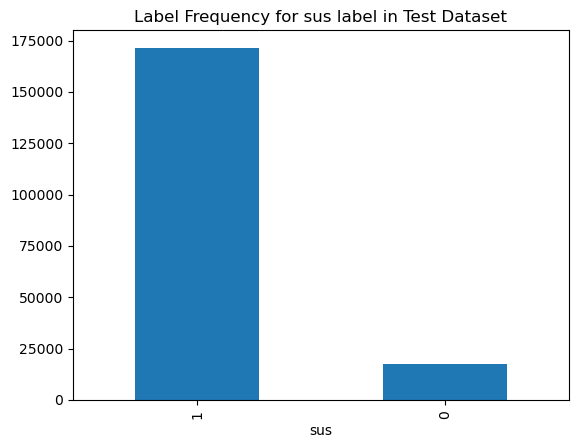

In [22]:
test_df.sus.value_counts().plot(kind='bar', title='Label Frequency for sus label in Test Dataset')

In [23]:
train_df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,761875
1,1269


In [24]:
test_df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,17508
1,171459


In [25]:
validation_df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,188181
1,786


### Feature correlation within the datasets

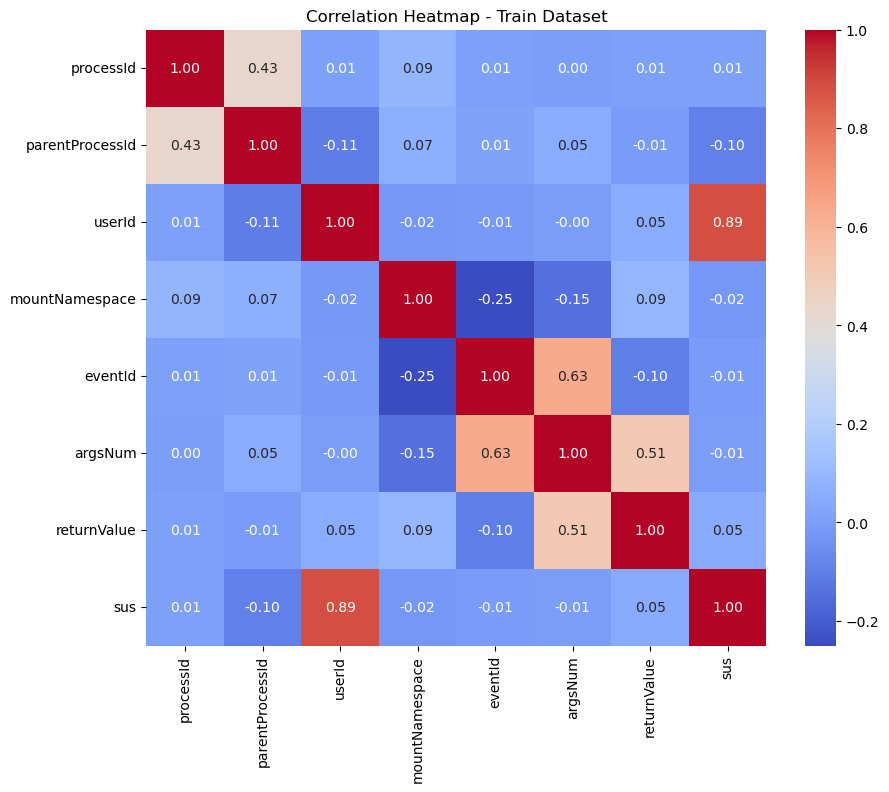

In [26]:
numerical_data_train = train_df.select_dtypes(include=['number'])
corr_train = numerical_data_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Train Dataset')
plt.show()


In [27]:
highest_correlation_train = corr_train.unstack().sort_values(ascending=False)
highest_correlation_train = highest_correlation_train[highest_correlation_train != 1.0].drop_duplicates()
print("Highest correlation values in the train dataset:")
print(highest_correlation_train.head(20))


Highest correlation values in the train dataset:
sus              userId             0.885770
eventId          argsNum            0.631485
argsNum          returnValue        0.507900
parentProcessId  processId          0.433302
returnValue      mountNamespace     0.088407
processId        mountNamespace     0.086792
parentProcessId  mountNamespace     0.067091
returnValue      userId             0.051784
parentProcessId  argsNum            0.048135
returnValue      sus                0.047463
parentProcessId  eventId            0.014725
processId        eventId            0.008200
sus              processId          0.006033
processId        userId             0.005344
                 returnValue        0.005065
                 argsNum            0.000824
userId           argsNum           -0.004260
sus              argsNum           -0.005321
returnValue      parentProcessId   -0.008063
sus              eventId           -0.010394
dtype: float64


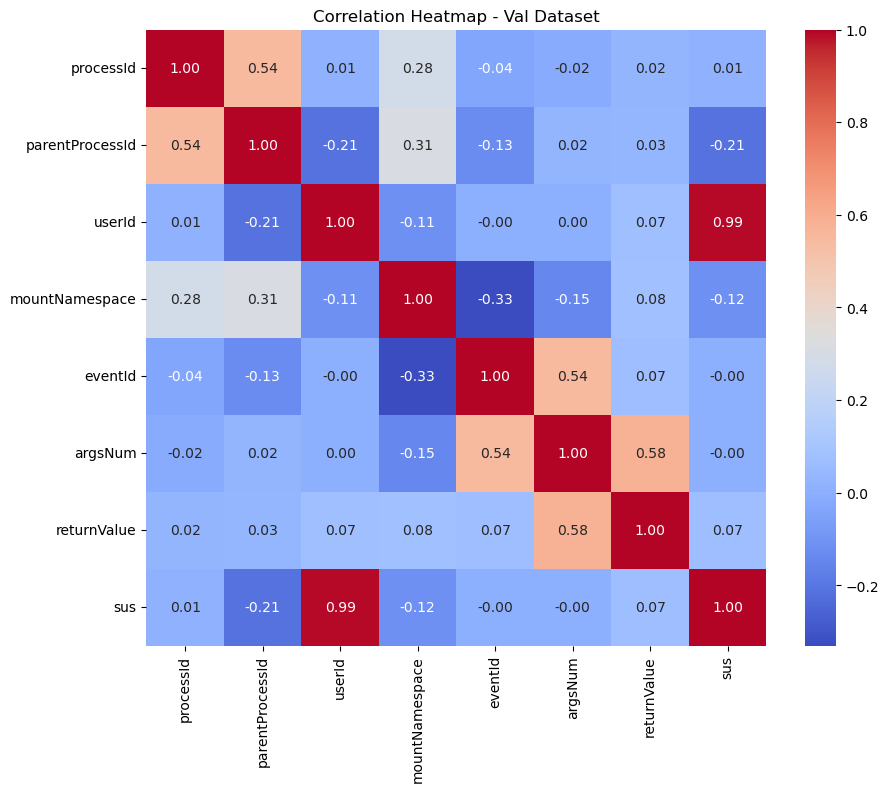

In [28]:
numerical_data_val = validation_df.select_dtypes(include=['number'])
corr_val = numerical_data_val.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_val, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Val Dataset')
plt.show()


In [29]:
highest_correlation_val = corr_val.unstack().sort_values(ascending=False)
highest_correlation_val = highest_correlation_val[highest_correlation_val != 1.0].drop_duplicates()
print("Highest correlation values in the test dataset:")
print(highest_correlation_val.head(20))


Highest correlation values in the test dataset:
userId           sus                0.994235
argsNum          returnValue        0.579772
eventId          argsNum            0.544303
parentProcessId  processId          0.544231
                 mountNamespace     0.311114
processId        mountNamespace     0.281689
returnValue      mountNamespace     0.077014
userId           returnValue        0.070666
returnValue      sus                0.069762
eventId          returnValue        0.068078
returnValue      parentProcessId    0.028907
                 processId          0.024613
argsNum          parentProcessId    0.023358
processId        sus                0.010179
                 userId             0.010120
userId           argsNum            0.000072
sus              argsNum           -0.000883
eventId          sus               -0.002257
                 userId            -0.002695
processId        argsNum           -0.016910
dtype: float64


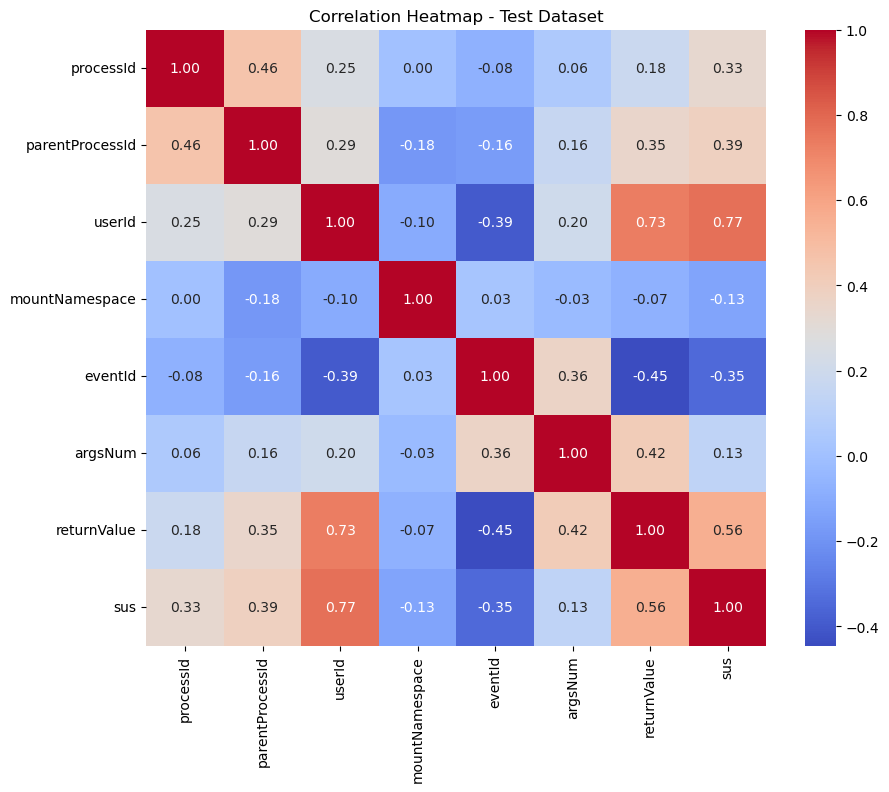

In [30]:
numerical_data_test = test_df.select_dtypes(include=['number'])
corr_test = numerical_data_test.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_test, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Test Dataset')
plt.show()


In [31]:
highest_correlation_test = corr_test.unstack().sort_values(ascending=False)
highest_correlation_test = highest_correlation_test[highest_correlation_test != 1.0].drop_duplicates()
print("Highest correlation values in the test dataset:")
print(highest_correlation_test.head(20))


Highest correlation values in the test dataset:
sus              userId             0.770769
userId           returnValue        0.730780
sus              returnValue        0.556168
processId        parentProcessId    0.461163
returnValue      argsNum            0.417135
parentProcessId  sus                0.388182
eventId          argsNum            0.364773
returnValue      parentProcessId    0.348721
processId        sus                0.329341
parentProcessId  userId             0.293362
processId        userId             0.253846
argsNum          userId             0.202778
returnValue      processId          0.180490
argsNum          parentProcessId    0.162376
                 sus                0.129866
                 processId          0.057190
eventId          mountNamespace     0.027301
mountNamespace   processId          0.004408
                 argsNum           -0.032944
returnValue      mountNamespace    -0.074593
dtype: float64


Entropy Analysis

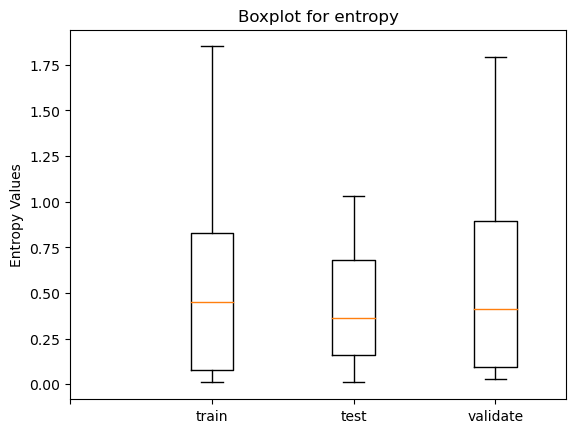

In [32]:
dataset = [train_df, test_df, validation_df]
entropy_vals = []
for data in dataset:
    dataset_entropy_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_entropy = stats.entropy(counts)
            dataset_entropy_vals.append(feat_entropy)
            
    entropy_vals.append(dataset_entropy_vals)

plt.boxplot(entropy_vals)
plt.title('Boxplot for entropy')
plt.ylabel("Entropy Values")
plt.xticks([0,1,2,3],labels=['','train', 'test', 'validate'])
plt.show()

Variation

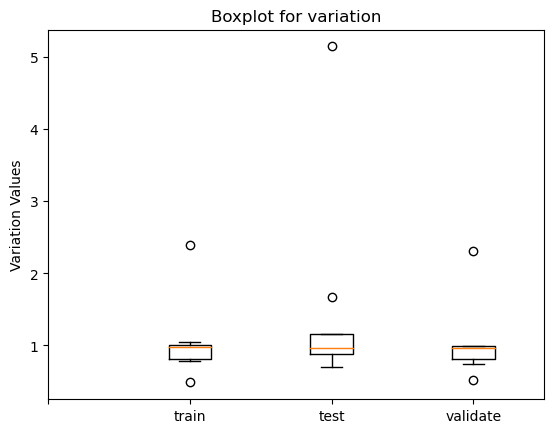

In [33]:
dataset = [train_df, test_df, validation_df]
variation_vals = []
for data in dataset:
    dataset_var_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_var = stats.variation(counts)
            dataset_var_vals.append(feat_var)
            
    variation_vals.append(dataset_var_vals)

plt.boxplot(variation_vals)
plt.title('Boxplot for variation')
plt.ylabel("Variation Values")
plt.xticks([0,1,2,3],labels=['','train', 'test', 'validate'])
plt.show()